# 回帰木（特徴量：MedInc、max_depth=2）の予測値の可視化

In [1]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.1
# !pip install scikit-learn==1.2.2

In [2]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [3]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
0.20.1
1.2.2


In [4]:
# データセットの読み込み
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
#df.head()

In [5]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['MedInc']] # 特徴量に100件のMedInc（世帯所得）を設定
y_train = df.loc[:99, 'MedHouseVal'] # 正解値に100件のMedHouseVal（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])

X_train:    MedInc
0  8.3252
1  8.3014
2  7.2574
y_train: 0    4.526
1    3.585
2    3.521
Name: MedHouseVal, dtype: float64


In [6]:
# モデルの学習
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='squared_error', max_depth=2, min_samples_leaf=1, ccp_alpha=0, random_state=0) # 深さ2の回帰木モデル
model.fit(X_train, y_train)
model.get_params()

{'ccp_alpha': 0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [7]:
# 予測値
model.predict(X_train)

array([3.87733333, 3.87733333, 3.87733333, 2.32507692, 2.32507692,
       2.32507692, 2.32507692, 2.32507692, 1.26378961, 2.32507692,
       2.32507692, 2.32507692, 2.32507692, 1.73075   , 1.26378961,
       1.26378961, 1.73075   , 1.26378961, 1.26378961, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 1.26378961, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 1.26378961, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 1.26378961, 1.73075   ,
       1.26378961, 1.26378961, 1.26378961, 2.32507692, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 2.32507692, 1.73075   ,
       1.73075   , 1.26378961, 1.26378961, 1.26378961, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 1.26378961, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 1.26378961, 1.26378961,
       2.32507692, 2.32507692, 1.26378961, 1.26378961, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 1.26378961, 1.26378961,
       1.26378961, 1.26378961, 1.26378961, 1.26378961, 1.26378

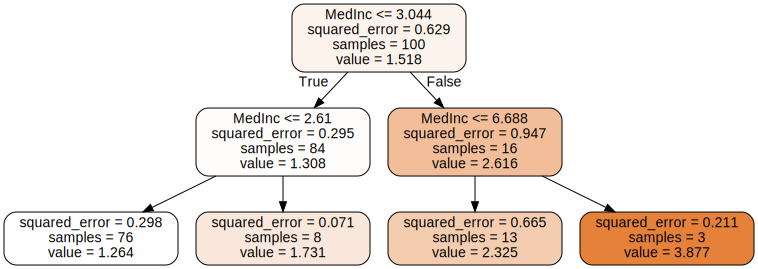

In [8]:
# 木の可視化
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None, rounded=True, feature_names=['MedInc'], filled=True)
graphviz.Source(dot_data, format='png')

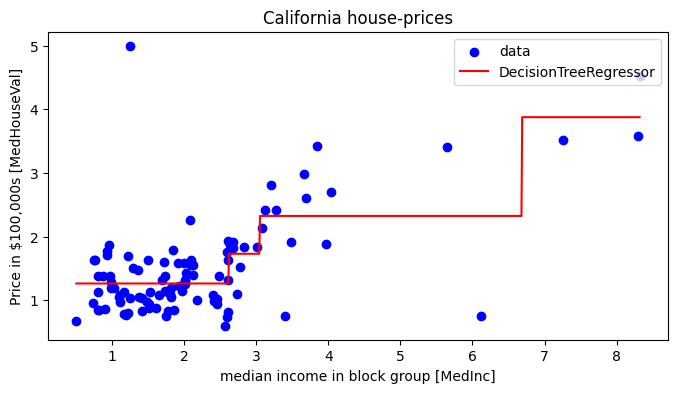

In [9]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = pd.DataFrame({'MedInc': np.arange(X.min(), X.max(), 0.01)})
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(世帯所得と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red' ,label='DecisionTreeRegressor')
plt.ylabel('Price in $100,000s [MedHouseVal]')
plt.xlabel('median income in block group [MedInc]')
plt.title('California house-prices')
plt.legend(loc='upper right')
plt.show()